<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/4_2_SGDClassifier_LuckyBag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Stochastic Gradient Descent 확률적 경사 하강법*** \

*점진적으로 학습하는 로지스틱 회귀 모델!( with log_loss function)* \

훈련 세트에서 랜덤하게 하나의 샘플을 골라 가파른 경사를 조금씩 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 전체 샘플을 모두 사용할 때까지 계속한다. >> ***Epoch*** (훈련 세트를 한 번 모두 사용하는 과정) >> 다시 훈련세트를 채워서 반복. \

점진적으로 가장 가까운거리(가파른 경사)를 조금씩 조금씩 내려가므로, 훈련세트에 조금씩 조금씩 샘플을 넣어서 알고리즘을 발전시킬 수 있다. (training set가 점점 늘어가면 갈 수록 컴퓨터 과부하 >> training set 넣을 때 마다 처음부터 다시 세트를 훈련시키기에는 무리라구욧..!)

**Stochastic Gradient Descent** : 1개씩 \

**Minibatch Gradient Descent** : 여러 개씩 \

**Batch Gradient Descent** : 모두 한번에 \

손실 함수라는 산을 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘.


***Loss Function*** \

Standard that measure how bad is the algorithm >> lower loss function means good algorithm


***Logistic Loss Function or Binary Cross-entropy Loss Function*** \

**Cross-entropy Loss Function** for multiple classification

**positive class(target = 1)** >> loss : -log(probability) >>> when the probability is getting close to 0, the loss becomes a huge positive number. \

**negative class(target = 0)** >> loss : -log(1 - probability) >>> when the probability is getting close to 1, the loss becomes a huge positive number. \

The probability is a probability of input is in the positive class(1). \
so, the probability of negative class >> 1 - probability


In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) #loss='log' >> logistic loss function
#max_inter = 10 >> epoch num
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#한번에 훈련 세트 전체를 전달했지만, SGD 알고리즘이 하나씩 샘플을 꺼내와서 경사 하강법 단계 수행.

sc.partial_fit(train_scaled, train_target) #1 에포크씩 이어서 훈련.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))



0.773109243697479
0.775
0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


***Early Stopping*** \

Stop training before the overfitting starts.\
훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다. >> start of overfitting


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


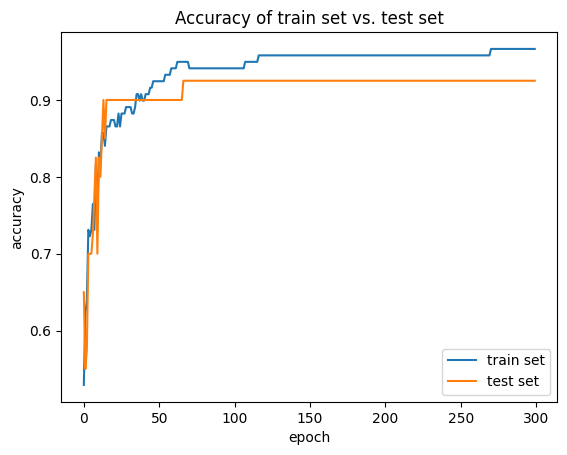

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes) #partial_fit()만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해야됨.
  #classes = classes
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy of train set vs. test set')
plt.legend(['train set', 'test set'])
plt.show()

#It shows the score difference between train set and test set gets bigger from 100th epoch
#>> 100 epoches is proper number of epoch


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤.
#tol = 향상될 최소값을 지정. >> none으로 지정해서 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복!
#We also have SGDRegressor


0.957983193277311
0.925


***Hinge Loss***  for support vector machine \

another machine learning algorithm. >> SGDClassifier supports many machine learing algorithm with various loss functions like log_loss and hinge.

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter = 100, tol=None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.9495798319327731
0.925
